In [1]:
from dotenv import load_dotenv
import os
load_dotenv()  # take environment variables from .env.

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token=os.getenv('QISKIT_IBM_TOKEN'))

Transpiler is made of 2 primary components:
- pass- it transforms the circuit from its current state into a new state that follows the task that it is configured to perform
- passmanager - to specify passes you wish to use, it allows indivuduall passes to communicate among each other.

In [2]:
from qiskit.transpiler import passes

print(dir(passes))

['ALAPSchedule', 'ALAPScheduleAnalysis', 'AQCSynthesisPlugin', 'ASAPSchedule', 'ASAPScheduleAnalysis', 'AlignMeasures', 'ApplyLayout', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CheckGateDirection', 'CheckMap', 'Collect1qRuns', 'Collect2qBlocks', 'CollectAndCollapse', 'CollectCliffords', 'CollectLinearFunctions', 'CollectMultiQBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'CommutativeInverseCancellation', 'Commuting2qGateRouter', 'ConsolidateBlocks', 'ConstrainedReschedule', 'ContainsInstruction', 'ConvertConditionsToIfOps', 'CountOps', 'CountOpsLongestPath', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'DynamicalDecoupling', 'EchoRZXWeylDecomposition', 'ElidePermutations', 'EnlargeWithAncilla', 'Error', 'FilterOpNodes', 'FixedPoint', 'FullAncillaAllocation', 'GateDirection', 'GatesInBasis', 'HLSConfig', 'HighLevelSynthesis', 'HoareOptimizer', 'InstructionDurationCheck', 'InverseCancellation'

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, QuantumCircuit

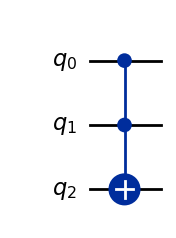

In [4]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.draw("mpl")

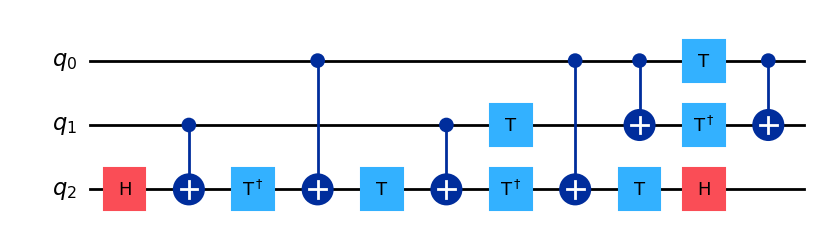

In [5]:
qc_decomposed = qc.decompose()
qc_decomposed.draw("mpl")

In [6]:
qc=QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()

┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘┌─┴─┐  │    │  
q_1: ─────┤ X ├──┼────┼──
          └───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

In [7]:
qc_decomposed=qc.decompose()
qc_decomposed.draw()

┌─────────┐               
q_0: ┤ U2(0,π) ├──■────■────■──
     └─────────┘┌─┴─┐  │    │  
q_1: ───────────┤ X ├──┼────┼──
                └───┘┌─┴─┐  │  
q_2: ────────────────┤ X ├──┼──
                     └───┘┌─┴─┐
q_3: ─────────────────────┤ X ├
                          └───┘

In [8]:
print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
print('Initial circuit operation count: ', qc.count_ops())
print('Decomposed circuit operation count: ', qc_decomposed.count_ops())

Initial circuit depth:  4
Decomposed circuit depth:  4
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Decomposed circuit operation count:  OrderedDict({'cx': 3, 'u2': 1})


In [9]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [10]:
ibm_backend = service.backend("ibm_kyiv")

In [11]:
ibm_backend.__dict__

{'_options': Options(shots=4000, memory=False, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, init_qubits=True, use_measure_esp=None, use_fractional_gates=False, noise_model=None, seed_simulator=None),
 '_provider': None,
 'name': 'ibm_kyiv',
 'description': None,
 'online_date': datetime.datetime(2022, 4, 12, 4, 0, tzinfo=tzutc()),
 'backend_version': '1.20.22',
 '_coupling_map': None,
 '_instance': 'ibm-q/open/main',
 '_service': <QiskitRuntimeService>,
 '_api_client': <qiskit_ibm_runtime.api.clients.runtime.RuntimeClient at 0x7f352b646270>,
 '_configuration': <qiskit_ibm_runtime.models.backend_configuration.PulseBackendConfiguration at 0x7f350e5a1bd0>,
 '_properties': <qiskit_ibm_runtime.models.backend_properties.BackendProperties at 0x7f350e7927b0>,
 '_defaults': <qiskit_ibm_runtime.models.pulse_defaults.PulseDefaults at 0x7f350e792f90>,
 '_target': <qiskit.transpiler.target.

> Notes
> - T1 (Energy Relaxation Time): Longer T1 is better because it means the qubit can maintain its excited state (and thus store quantum information) for longer.
> - T2 (Decoherence Time): Longer T2 is better because it means the qubit can maintain superposition for longer.:

In [12]:
from qiskit import visualization

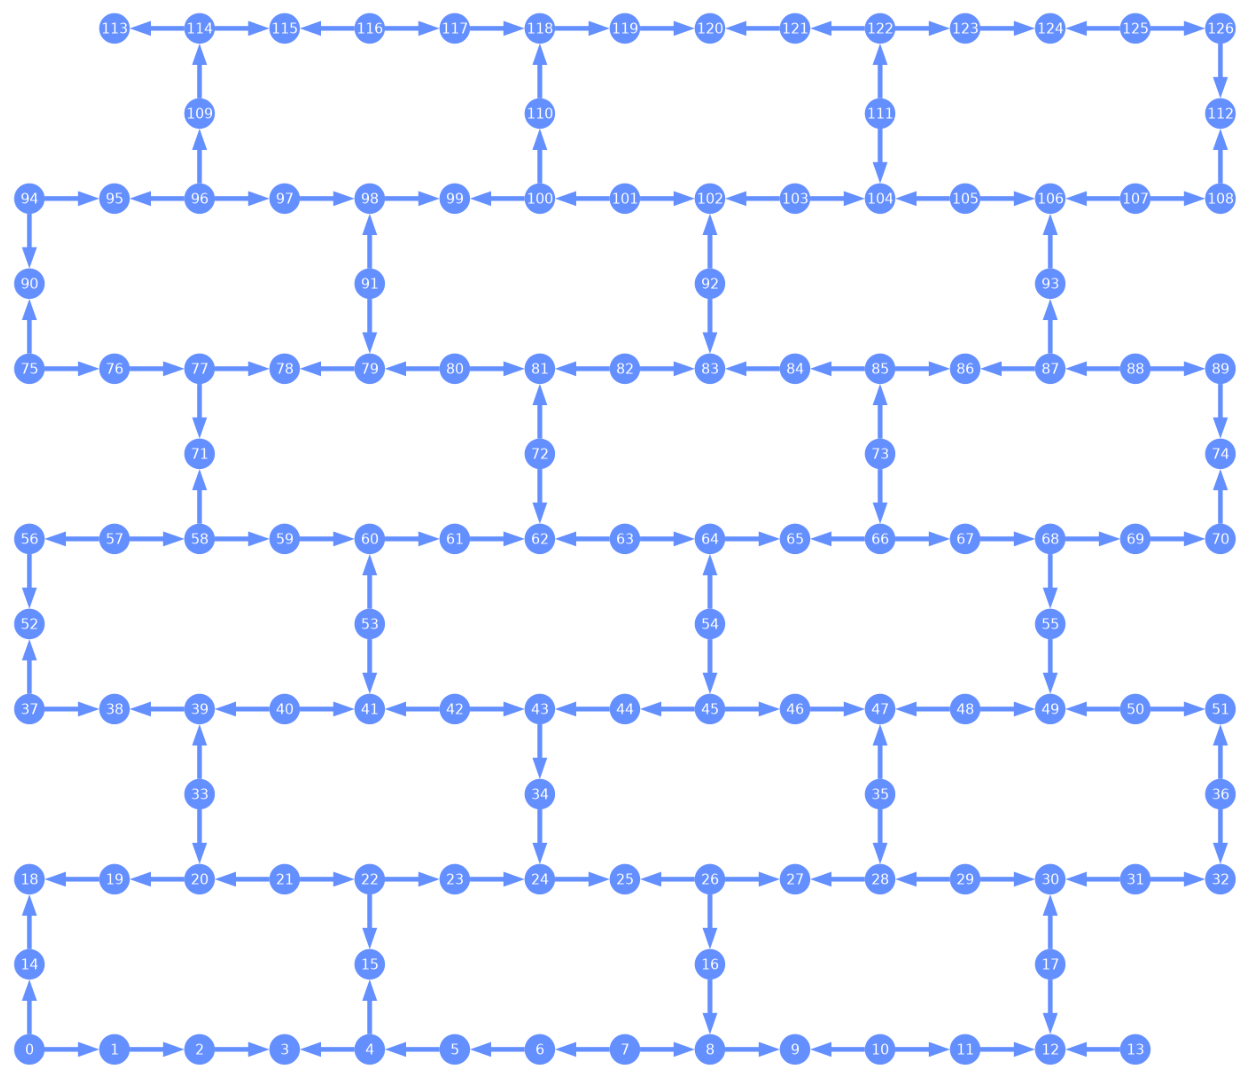

In [13]:
visualization.plot_gate_map(service.backend('ibm_kyiv'), plot_directed=True)

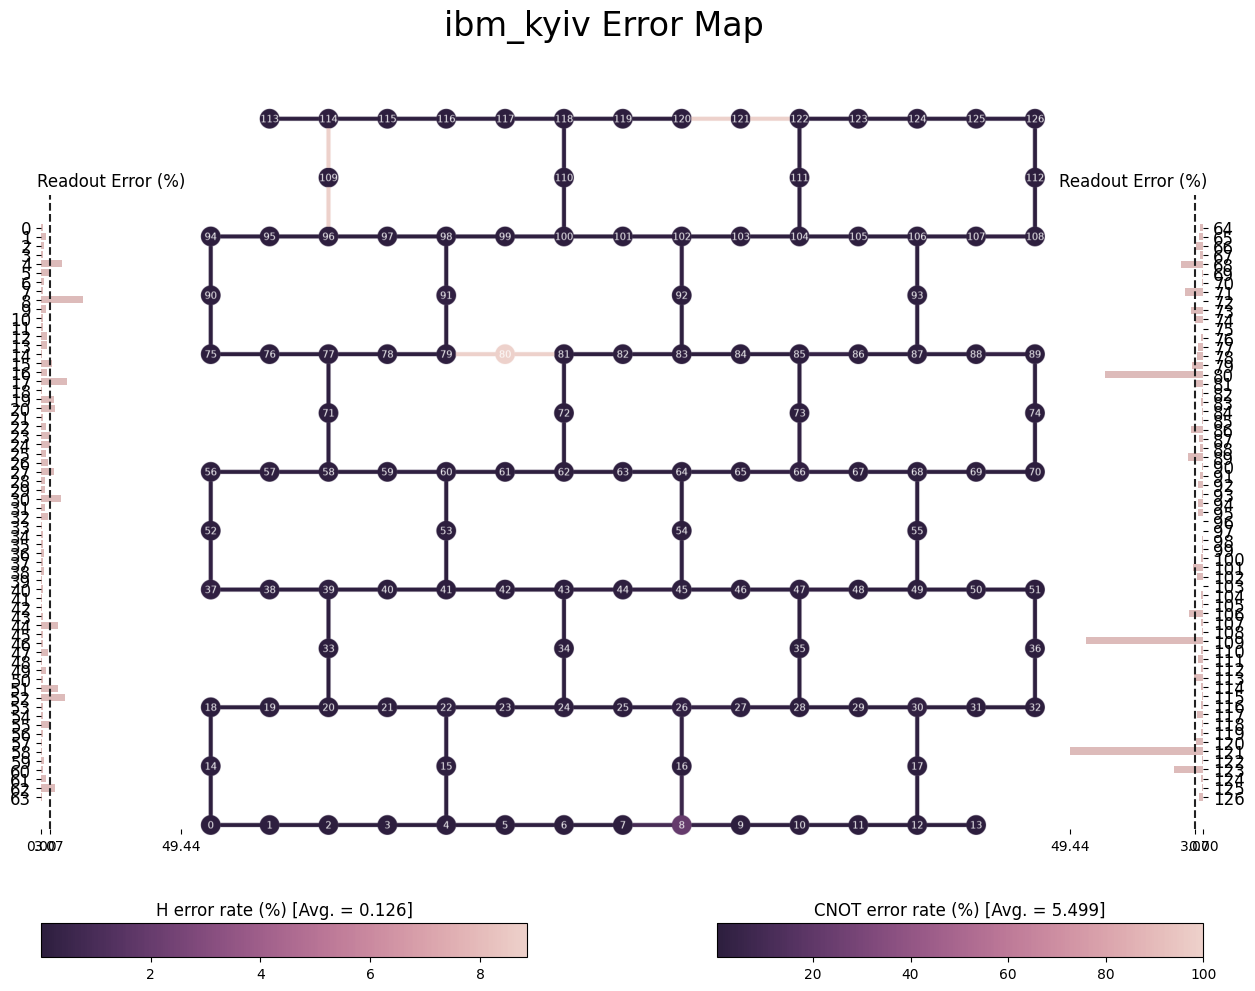

In [14]:
visualization.plot_error_map(service.backend('ibm_kyiv'))

In [15]:
from qiskit.transpiler import generate_preset_pass_manager

In [16]:
pm = generate_preset_pass_manager(backend=ibm_backend, optimization_level=1)

transpiled_qc = pm.run(qc)

print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
print('Transpiled circuit depth: ', transpiled_qc.depth())
print('Initial circuit operation count: ', qc.count_ops())
print('Decomposed circuit operation count: ', qc_decomposed.count_ops())
print('Transpiled circuit operation count: ', transpiled_qc.count_ops())


Initial circuit depth:  4
Decomposed circuit depth:  4
Transpiled circuit depth:  11
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Decomposed circuit operation count:  OrderedDict({'cx': 3, 'u2': 1})
Transpiled circuit operation count:  OrderedDict({'rz': 15, 'sx': 10, 'ecr': 3})


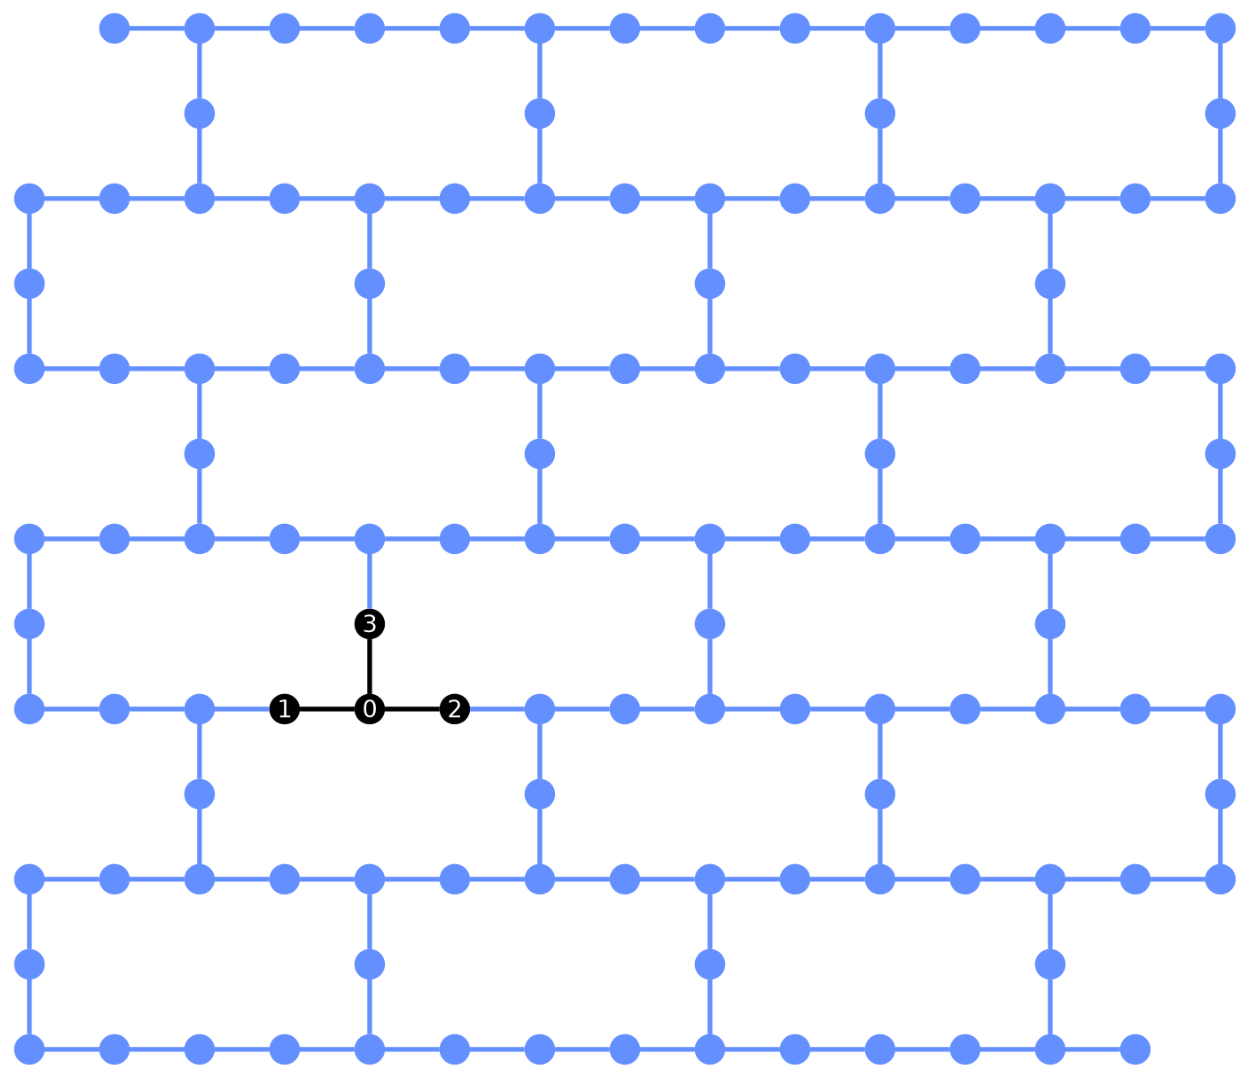

In [17]:
visualization.plot_circuit_layout(transpiled_qc, ibm_backend)

5 general types of passes
- layout selection: how qubit layout mapping will align in the selected backend
- routing: maps the placement of swap gates onto the circuit based on the selected swap mapping type which can be set by providing a coupling map or backend topology
- basis change: outputs ways to decompose the gates down to the basis gates od the backend or using the circuit's decompistion rules
- optimization: optimize the gates by eirther remocing redundant gates, such as having two of the same gates back to back which reverts the gate to the original state
- circuit analysis: gives circuit info like depth, eidth, no_ops, ...
- additional passes: some other optimizations like check maps which check whether the layour of the CNOT gates are in the direction stated in the coupling maps and rearrange the directions if needed


layout selection
- TrivialLayout [optimization_lvl=0] - assigns n qubits o the decie qubits in the same order as stated in the original q circuit
- DenseLayout [optimization_lvl=1] - selects layout which has the most connected subset of qubits (if there is large number of entangled qubits this layout will find a subset of which qubits are closely connected to each other to avoid long distance and swaps)
- NoiseAdaptiveLayout [optimization_lvl = 2 or 3] - leverages a qubit mapping technique that leverages the calibration in infromation from the backend devices and evaluates serveral optimal and heuristic mappings

In [18]:
qc=QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()

┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘┌─┴─┐  │    │  
q_1: ─────┤ X ├──┼────┼──
          └───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

In [19]:
def plot_circuit_diagram(qc, backend):
    diag = []
    for i in range(0, 4):
        pm = generate_preset_pass_manager(backend=backend, optimization_level=i)
        transpiled_qc = pm.run(qc)
        print("\n---\n")
        print(f"Optimization level {i}")
        print('Initial circuit depth: ', qc.depth())
        print('Transpiled circuit depth: ', transpiled_qc.depth())
        print('Initial circuit operation count: ', qc.count_ops())
        print('Transpiled circuit operation count: ', transpiled_qc.count_ops())
        print("\n---\n")
        diag.append({
            "plot_circuit": visualization.plot_circuit_layout(transpiled_qc, backend),
            "diagram": transpiled_qc.draw("mpl")
        })
    return diag

In [20]:
gg = plot_circuit_diagram(qc, ibm_backend)


---

Optimization level 0
Initial circuit depth:  4
Transpiled circuit depth:  46
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Transpiled circuit operation count:  OrderedDict({'rz': 47, 'sx': 22, 'ecr': 9, 'x': 3})

---


---

Optimization level 1
Initial circuit depth:  4
Transpiled circuit depth:  11
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Transpiled circuit operation count:  OrderedDict({'rz': 15, 'sx': 10, 'ecr': 3})

---


---

Optimization level 2
Initial circuit depth:  4
Transpiled circuit depth:  21
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Transpiled circuit operation count:  OrderedDict({'rz': 23, 'sx': 13, 'ecr': 3})

---


---

Optimization level 3
Initial circuit depth:  4
Transpiled circuit depth:  21
Initial circuit operation count:  OrderedDict({'cx': 3, 'h': 1})
Transpiled circuit operation count:  OrderedDict({'rz': 23, 'sx': 13, 'ecr': 3})

---



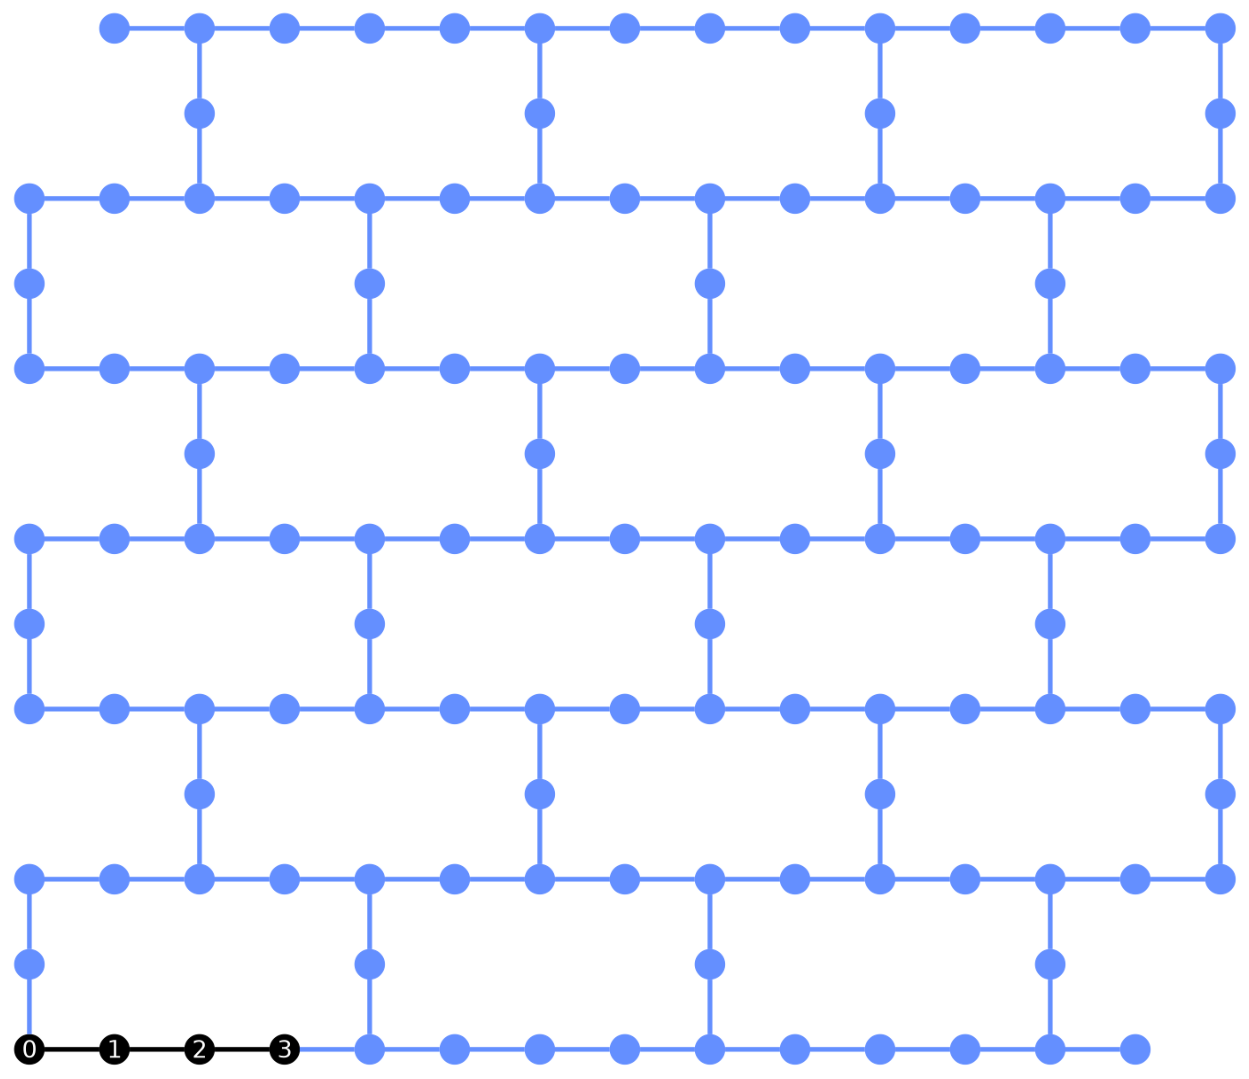

In [21]:
gg[0].get("plot_circuit")

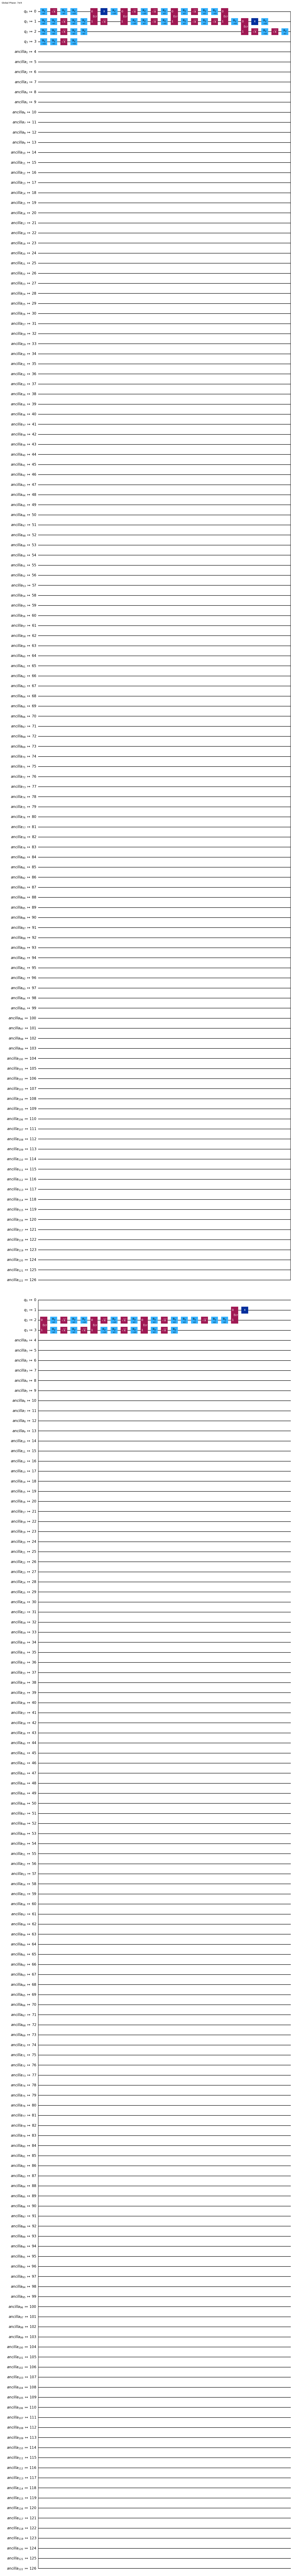

In [22]:
gg[0].get("diagram")

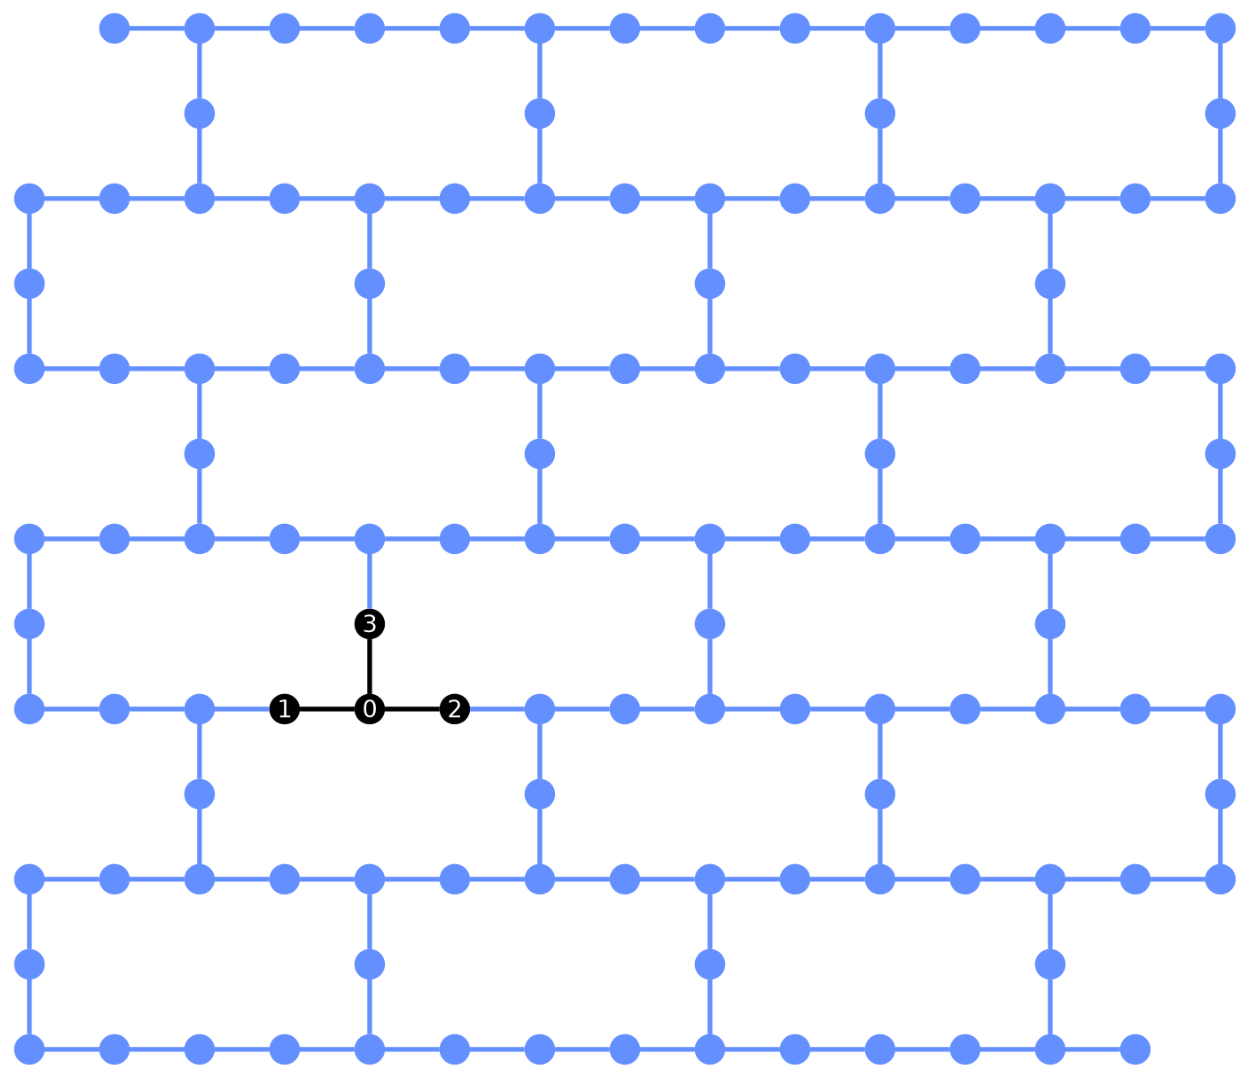

In [23]:
gg[1].get("plot_circuit")

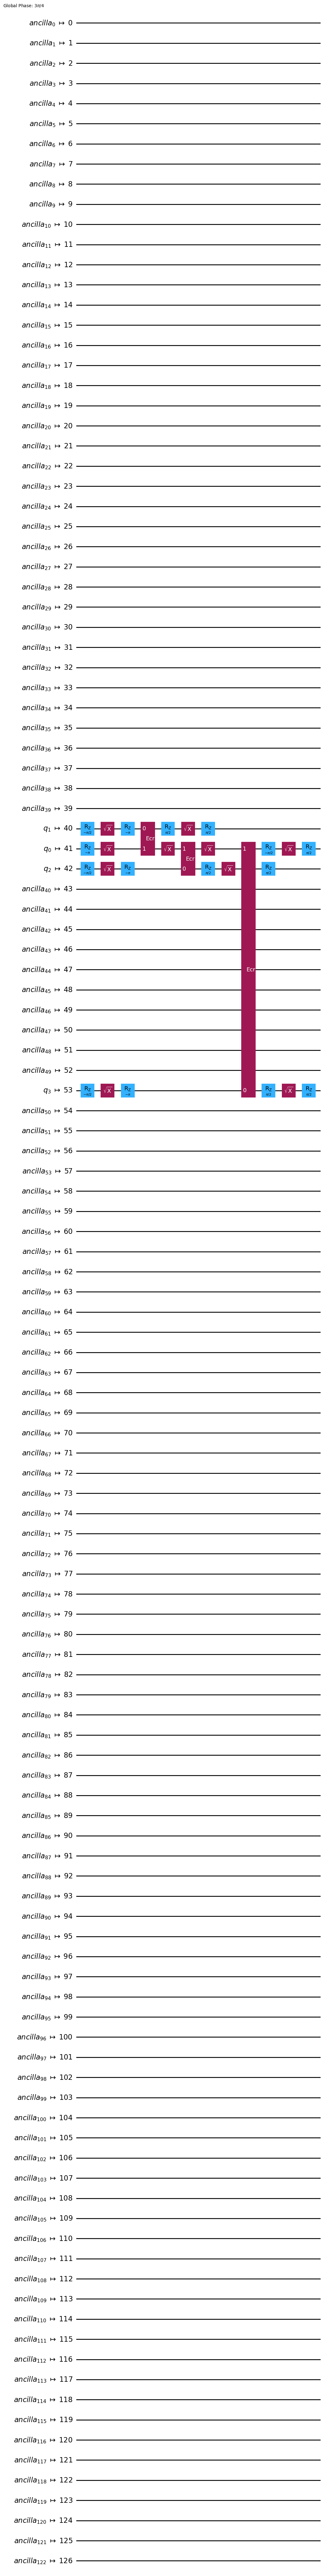

In [24]:
gg[1].get("diagram")

In [25]:
ibm_backend.configuration().coupling_map

[[0, 1],
 [0, 14],
 [1, 2],
 [2, 3],
 [4, 3],
 [4, 15],
 [5, 4],
 [6, 5],
 [7, 6],
 [7, 8],
 [8, 9],
 [10, 9],
 [10, 11],
 [11, 12],
 [13, 12],
 [14, 18],
 [16, 8],
 [17, 12],
 [17, 30],
 [19, 18],
 [20, 19],
 [21, 20],
 [21, 22],
 [22, 15],
 [22, 23],
 [23, 24],
 [24, 25],
 [26, 16],
 [26, 25],
 [26, 27],
 [28, 27],
 [29, 28],
 [29, 30],
 [31, 30],
 [31, 32],
 [33, 20],
 [33, 39],
 [34, 24],
 [35, 28],
 [35, 47],
 [36, 32],
 [36, 51],
 [37, 38],
 [37, 52],
 [39, 38],
 [40, 39],
 [40, 41],
 [42, 41],
 [42, 43],
 [43, 34],
 [44, 43],
 [45, 44],
 [45, 46],
 [46, 47],
 [48, 47],
 [48, 49],
 [50, 49],
 [50, 51],
 [53, 41],
 [53, 60],
 [54, 45],
 [54, 64],
 [55, 49],
 [56, 52],
 [57, 56],
 [57, 58],
 [58, 59],
 [58, 71],
 [59, 60],
 [60, 61],
 [61, 62],
 [63, 62],
 [63, 64],
 [64, 65],
 [66, 65],
 [66, 67],
 [67, 68],
 [68, 55],
 [68, 69],
 [69, 70],
 [70, 74],
 [72, 62],
 [72, 81],
 [73, 66],
 [73, 85],
 [75, 76],
 [75, 90],
 [76, 77],
 [77, 71],
 [77, 78],
 [79, 78],
 [80, 79],
 [80, 81],

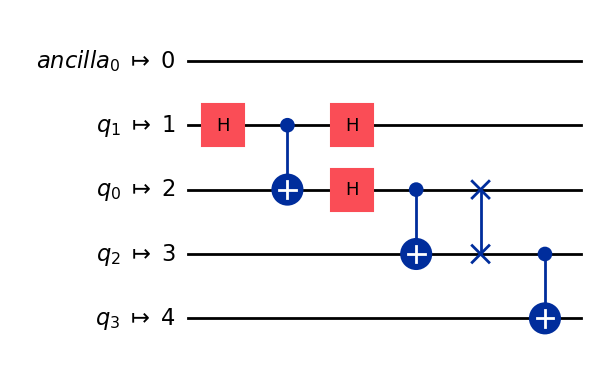

In [26]:
custom_linear_topology = [[0,1], [1,2], [2,3], [3,4]]

pm = generate_preset_pass_manager(coupling_map=custom_linear_topology)
transpiled_qc = pm.run(qc)
transpiled_qc.draw("mpl")

In [27]:
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import TrivialLayout, BasicSwap

In [36]:
trivial = TrivialLayout(CouplingMap(ibm_backend.configuration().coupling_map))
pm = PassManager()
pm.append(trivial)
pm.run(qc).draw()

qc.measure_all()

In [37]:
basic_swp = BasicSwap(CouplingMap(ibm_backend.configuration().coupling_map))
pm = PassManager()
pm.append(basic_swp)
pm.run(qc).draw()

┌───┐                      ░    ┌─┐      
   q_0: ┤ H ├──■───X───────────────░────┤M├──────
        └───┘┌─┴─┐ │               ░    └╥┘┌─┐   
   q_1: ─────┤ X ├─X───■───X───────░─────╫─┤M├───
             └───┘   ┌─┴─┐ │       ░ ┌─┐ ║ └╥┘   
   q_2: ─────────────┤ X ├─X───■───░─┤M├─╫──╫────
                     └───┘   ┌─┴─┐ ░ └╥┘ ║  ║ ┌─┐
   q_3: ─────────────────────┤ X ├─░──╫──╫──╫─┤M├
                             └───┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════╩══╩══╩══╩═
                                      0  1  2  3

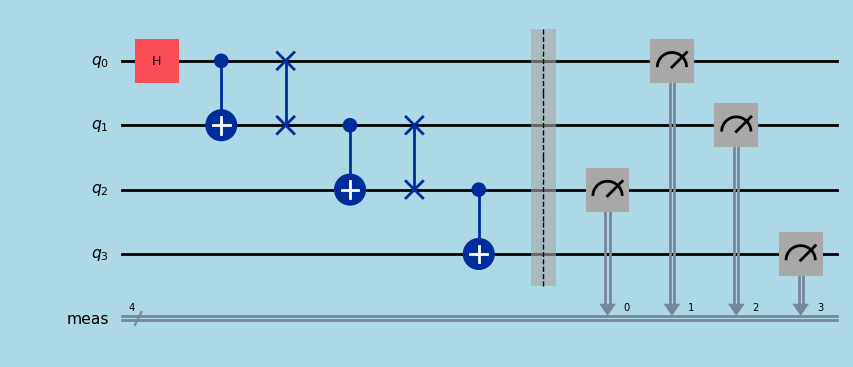

In [38]:
pm.run(qc).draw(output="mpl", style={'backgroundcolor': 'lightblue', 'gatefacecolor': 'white', 'gatetextcolor': 'black', 'fontsize': 9})

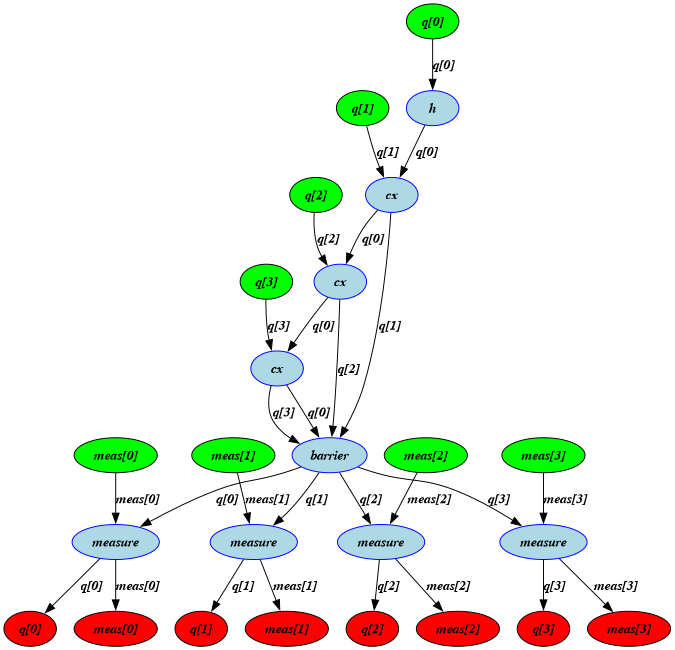

In [39]:
from qiskit.converters import circuit_to_dag

visualization.dag_drawer(circuit_to_dag(qc))